In [35]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, fbeta_score, recall_score,confusion_matrix, classification_report \
,roc_auc_score, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from collections import Counter
from imblearn.pipeline import Pipeline, make_pipeline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import multiprocessing
from IPython.display import display
cpn_cnt = multiprocessing.cpu_count()

%matplotlib inline

In [2]:
raw = pd.read_csv('./Speed Dating Data.csv', encoding= 'unicode_escape')

In [3]:
raw.shape

(8378, 195)

In [4]:
raw.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
raw.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [7]:
raw.drop(['id', 'iid'], axis=1, inplace=True)

In [8]:
# Compare how many matched successfully and didn't get a match

pd.crosstab(raw['match'], 'count')

col_0,count
match,
0,6998
1,1380


In [11]:
# Check similar attributes with same prefix

filter_1 = ['gender', 'match', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'satis_2', 'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']
raw = raw[filter_1]
#for f in sorted(list(raw)):
#    print(f)

ambs = '''amb
amb1_1
amb1_2
amb1_3
amb1_s
amb2_1
amb2_2
amb2_3
amb3_1
amb3_2
amb3_3
amb3_s
amb4_1
amb4_2
amb4_3
amb5_1
amb5_2
amb5_3
amb7_2
amb7_3
amb_o'''.split()

attrs = '''attr
attr1_1
attr1_2
attr1_3
attr1_s
attr2_1
attr2_2
attr2_3
attr3_1
attr3_2
attr3_3
attr3_s
attr4_1
attr4_2
attr4_3
attr5_1
attr5_2
attr5_3
attr7_2
attr7_3
attr_o'''.split()

funs = '''fun
fun1_1
fun1_2
fun1_3
fun1_s
fun2_1
fun2_2
fun2_3
fun3_1
fun3_2
fun3_3
fun3_s
fun4_1
fun4_2
fun4_3
fun5_1
fun5_2
fun5_3
fun7_2
fun7_3
fun_o'''.split()

intels = '''intel
intel1_1
intel1_2
intel1_3
intel1_s
intel2_1
intel2_2
intel2_3
intel3_1
intel3_2
intel3_3
intel3_s
intel4_1
intel4_2
intel4_3
intel5_1
intel5_2
intel5_3
intel7_2
intel7_3
intel_o'''.split()

shars = '''shar
shar1_1
shar1_2
shar1_3
shar1_s
shar2_1
shar2_2
shar2_3
shar4_1
shar4_2
shar4_3
shar7_2
shar7_3
shar_o'''.split()

sincs = '''sinc
sinc1_1
sinc1_2
sinc1_3
sinc1_s
sinc2_1
sinc2_2
sinc2_3
sinc3_1
sinc3_2
sinc3_3
sinc3_s
sinc4_1
sinc4_2
sinc4_3
sinc5_1
sinc5_2
sinc5_3
sinc7_2
sinc7_3
sinc_o'''.split()

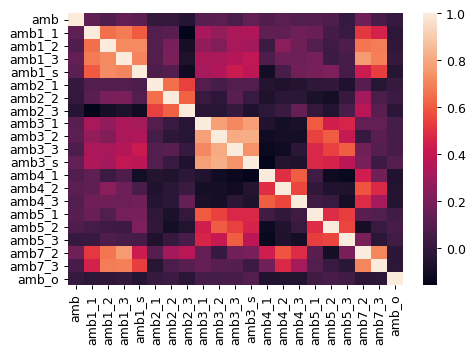

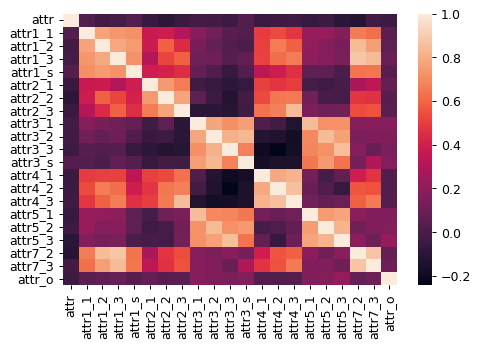

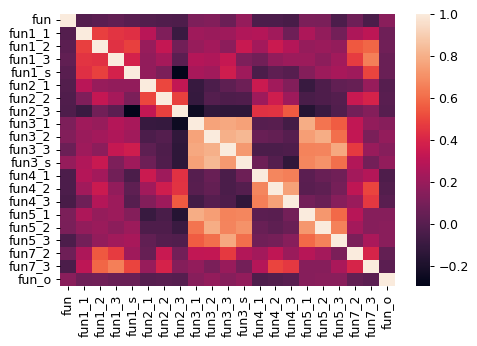

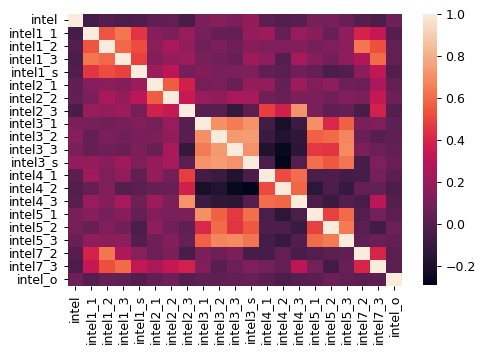

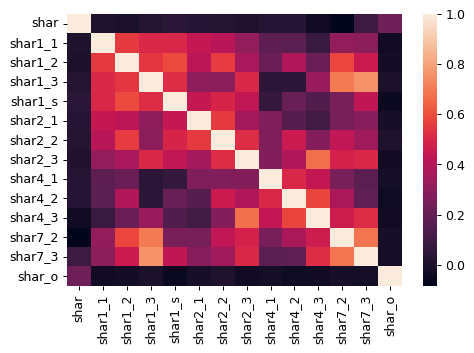

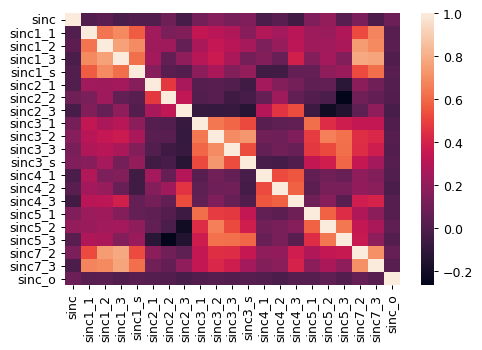

In [12]:
# Check how similar of attributes sharing the same prefix

intersted_field = [ambs, attrs, funs, intels, shars, sincs]

for f in intersted_field:
    fig, ax = plt.subplots(dpi=90)
    corr = raw[f].corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
    plt.show()

In [14]:
# Select features

others = '''age
age_o
art
career_c
clubbing
concerts
date
date_3
dec
dec_o
dining
exercise
exphappy
expnum
gaming
gender
go_out
goal
hiking
imprace
imprelig
income
int_corr
length
like
like_o
match_es
met
met_o
movies
museums
music
num_in_3
numdat_2
numdat_3
pf_o_amb
pf_o_att
pf_o_fun
pf_o_int
pf_o_sha
pf_o_sin
prob
prob_o
reading
satis_2
shopping
sports
theater
them_cal
tv
tvsports
yoga
you_call'''.split()

filter_2 = ['match', 'amb', 'amb1_1', 'amb2_1', 'amb3_1', 'amb4_1', 'amb5_1', 'amb7_2', 'amb_o', 
'attr', 'attr1_1', 'attr2_1', 'attr3_1', 'attr4_1', 'attr5_1', 'attr7_2', 'attr_o',
'fun', 'fun1_1', 'fun2_1', 'fun3_1', 'fun4_1', 'fun5_1', 'fun7_2', 'fun_o',
'intel', 'intel1_1', 'intel2_1', 'intel2_3', 'intel3_1', 'intel4_1', 'intel5_1', 'intel7_2', 'intel_o',
'sinc', 'sinc1_1', 'sinc2_1', 'sinc2_3', 'sinc3_1', 'sinc4_1', 'sinc5_1', 'sinc7_2', 'sinc_o'] + shars + others

# filter out uneeded columns
data = raw[filter_2]
data.isnull().sum()

match          0
amb          712
amb1_1        99
amb2_1        89
amb3_1       105
            ... 
them_cal    4404
tv            79
tvsports      79
yoga          79
you_call    4404
Length: 110, dtype: int64

In [15]:
# remove columns with too many null values
data = data.iloc[:, np.asarray(data.isnull().sum()<1000, dtype=np.bool)]
data.isnull().sum()

match         0
amb         712
amb1_1       99
amb2_1       89
amb3_1      105
           ... 
sports       79
theater      79
tv           79
tvsports     79
yoga         79
Length: 74, dtype: int64

In [16]:
# corrlations with match
corr = data.corrwith(data['match'])
corr.sort_values(ascending=False)

match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
              ...   
pf_o_sha   -0.048399
imprace    -0.049032
go_out     -0.060526
date       -0.063610
met_o      -0.106569
Length: 74, dtype: float64

In [17]:
neg = np.abs(corr)<0.01
black_list = list(corr[neg].keys())
black_list

['amb1_1',
 'amb2_1',
 'fun2_1',
 'intel3_1',
 'sinc3_1',
 'exercise',
 'gender',
 'pf_o_amb',
 'shopping',
 'theater',
 'tvsports']

In [19]:
### We don't know potential parter's decision in real world. 

black_list += ['dec_o']   # partner's decision, which will be the target variable 
black_list += ['career_c', 'length'] # not interested in career and length of night event
black_list

['amb1_1',
 'amb2_1',
 'fun2_1',
 'intel3_1',
 'sinc3_1',
 'exercise',
 'gender',
 'pf_o_amb',
 'shopping',
 'theater',
 'tvsports',
 'dec_o',
 'career_c',
 'length',
 'dec_o',
 'career_c',
 'length']

In [20]:
data.drop(black_list, axis=1, inplace=True)
for key, val in data.dtypes.items():
    print('{:>10}: {:s}'.format(str(key), str(val)))

     match: int64
       amb: float64
    amb3_1: float64
     amb_o: float64
      attr: float64
   attr1_1: float64
   attr2_1: float64
   attr3_1: float64
    attr_o: float64
       fun: float64
    fun1_1: float64
    fun3_1: float64
     fun_o: float64
     intel: float64
  intel1_1: float64
  intel2_1: float64
   intel_o: float64
      sinc: float64
   sinc1_1: float64
   sinc2_1: float64
    sinc_o: float64
   shar1_1: float64
   shar1_2: float64
   shar2_1: float64
       age: float64
     age_o: float64
       art: float64
  clubbing: float64
  concerts: float64
      date: float64
       dec: int64
    dining: float64
  exphappy: float64
    gaming: float64
    go_out: float64
      goal: float64
    hiking: float64
   imprace: float64
  imprelig: float64
  int_corr: float64
      like: float64
    like_o: float64
       met: float64
     met_o: float64
    movies: float64
   museums: float64
     music: float64
  numdat_2: float64
  pf_o_att: float64
  pf_o_fun: float64
  pf

In [21]:
# remove missing values
data.dropna(inplace=True)
data.isnull().sum()

match       0
amb         0
amb3_1      0
amb_o       0
attr        0
attr1_1     0
attr2_1     0
attr3_1     0
attr_o      0
fun         0
fun1_1      0
fun3_1      0
fun_o       0
intel       0
intel1_1    0
intel2_1    0
intel_o     0
sinc        0
sinc1_1     0
sinc2_1     0
sinc_o      0
shar1_1     0
shar1_2     0
shar2_1     0
age         0
age_o       0
art         0
clubbing    0
concerts    0
date        0
dec         0
dining      0
exphappy    0
gaming      0
go_out      0
goal        0
hiking      0
imprace     0
imprelig    0
int_corr    0
like        0
like_o      0
met         0
met_o       0
movies      0
museums     0
music       0
numdat_2    0
pf_o_att    0
pf_o_fun    0
pf_o_int    0
pf_o_sha    0
pf_o_sin    0
prob        0
prob_o      0
reading     0
satis_2     0
sports      0
tv          0
yoga        0
dtype: int64

In [25]:
print(data.shape)
data.sample(3)

(5567, 60)


,match,amb,amb3_1,amb_o,attr,attr1_1,attr2_1,attr3_1,attr_o,fun,...,pf_o_int,pf_o_sha,pf_o_sin,prob,prob_o,reading,satis_2,sports,tv,yoga
2270,0,9.0,2.0,5.0,8.0,16.67,9.09,8.0,6.0,6.0,...,16.98,13.21,16.98,4.0,1.0,10.0,8.0,3.0,8.0,2.0
5735,0,5.0,7.0,5.0,7.0,25.00,25.00,6.0,6.0,6.0,...,20.00,20.00,20.00,6.0,5.0,7.0,3.0,9.0,3.0,2.0
1111,0,6.0,7.0,9.0,2.0,10.00,40.00,8.0,10.0,8.0,...,21.00,8.00,24.00,10.0,7.0,7.0,7.0,6.0,7.0,4.0


In [29]:
# ANOVA analysis to find out what factors determine the 'match'

formula = 'match ~ amb*amb_o + attr*attr_o + fun*fun_o + intel*intel_o + sinc*sinc_o + C(shar1_1) + age*age_o + clubbing + date + dining + go_out + sports + int_corr + like*like_o + met*met_o + movies + museums + music + numdat_2 + prob*prob_o + reading + satis_2 + tv + yoga + gaming + goal + C(met)*C(met_o)' # 觀察變數
lm_model = ols(formula, data).fit()
aov_table = sm.stats.anova_lm(lm_model, typ=2)
aov_table['significant'] = np.where(significat_fators, '*', ' ')
display(aov_table)

/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F),significant
C(shar1_1),1.648724e+01,78.0,1.974799,8.527265e-07,*
C(met),-7.336254e-02,5.0,-0.137080,1.000000e+00,
C(met_o),5.478026e-02,4.0,0.127948,9.723360e-01,
C(met):C(met_o),2.901005e+00,20.0,1.355152,2.027792e-01,
amb,7.901104e-01,1.0,7.381716,6.609895e-03,*
amb_o,1.030364e+00,1.0,9.626321,1.927926e-03,*
amb:amb_o,1.674745e-01,1.0,1.564654,2.110389e-01,
attr,4.922861e+00,1.0,45.992509,1.313124e-11,*
attr_o,4.973575e+00,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976e+00,1.0,46.442035,1.045933e-11,*


In [30]:
# Display significant factors which p-value for f statistics <0.05

significat_fators = aov_table['PR(>F)']<0.05
display(aov_table[significat_fators]) 

,sum_sq,df,F,PR(>F),significant
C(shar1_1),16.487237,78.0,1.974799,8.527265e-07,*
amb,0.790110,1.0,7.381716,6.609895e-03,*
amb_o,1.030364,1.0,9.626321,1.927926e-03,*
attr,4.922861,1.0,45.992509,1.313124e-11,*
attr_o,4.973575,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976,1.0,46.442035,1.045933e-11,*
fun,1.169900,1.0,10.929955,9.523565e-04,*
fun_o,1.340485,1.0,12.523667,4.051893e-04,*
sinc,0.566476,1.0,5.292377,2.145665e-02,*
sinc_o,0.499662,1.0,4.668163,3.077034e-02,*


In [32]:
# Modeling
# Train data with Logistic model to predict potential match or not with selected attributes

X, Y = np.array(data.iloc[:, 1:], dtype=np.float32), np.array(data.iloc[:, 0], dtype=np.int16)
print(X.shape)
print(Y.shape)

parameters = {'C': [0.1, 1, 10], 'max_iter': [500, 1000], 'solver': ['lbfgs', 'liblinear']}

X, X_test, Y, Y_test = train_test_split(X, Y, random_state = 10, test_size=0.2, shuffle=True, stratify=Y)
print('{:d} samples for train/val, {:d} samples for testing.'.format(len(X), len(X_test)))

lr = GridSearchCV(LogisticRegression(), 
                  param_grid=parameters, 
                  cv=5, 
                  scoring='accuracy', 
                  n_jobs=max(1, cpn_cnt-1))
lr.fit(X, Y)
display(lr.cv_results_)

(5567, 59)
(5567,)
4453 samples for train/val, 1114 samples for testing.


/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'mean_fit_time': array([0.7827508 , 0.25117512, 1.05118341, 0.27385216, 0.74292693,
        0.45059776, 1.55518975, 0.47927055, 1.2336431 , 1.40703406,
        2.04768806, 1.02593794]),
 'std_fit_time': array([0.00100035, 0.02273343, 0.16372982, 0.02559431, 0.02730133,
        0.02752091, 0.11346277, 0.14359226, 0.08305901, 0.10209203,
        0.0418766 , 0.14671932]),
 'mean_score_time': array([0.00125694, 0.00127573, 0.00098505, 0.00127277, 0.00125437,
        0.00118561, 0.00621805, 0.00128942, 0.00137043, 0.00108438,
        0.00915318, 0.00088024]),
 'std_score_time': array([0.0002976 , 0.00041829, 0.00010106, 0.00057934, 0.00054184,
        0.00034126, 0.00934249, 0.00024509, 0.00073257, 0.00011916,
        0.01382808, 0.00020454]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=ob

In [33]:
display(lr.best_params_)

{'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}

In [36]:
print('Testing set performance: ')
# prediction
preds = lr.predict(X_test) 

# evaluations
acc = accuracy_score(Y_test, preds) 
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)
f1 = f1_score(Y_test, preds)
print('acc: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1: {:.2f}'.format(acc, precision, recall, f1))

Testing set performance: 
acc: 0.90, precision: 0.73, recall: 0.71, f1: 0.72


In [38]:
# Display factors importance
best_lr = lr.best_estimator_
W_inspect = np.append(best_lr.coef_.flatten(), best_lr.intercept_.flatten(), axis=-1) # Check weights of perceptron to acquire knowledge of dating? ;)
features_key = np.array(list(data.iloc[:, 1:]) + ['w0 (+1)'])
order = np.argsort(-W_inspect)
weights, keys = W_inspect[order], features_key[order]
for w, k in zip(weights, keys):
    print('{:>10}: {:.4f}'.format(k, w))

       dec: 5.9523
    like_o: 0.4863
    attr_o: 0.4205
  int_corr: 0.2017
    prob_o: 0.1823
      prob: 0.1512
     fun_o: 0.1419
   intel_o: 0.0509
     intel: 0.0426
       art: 0.0386
        tv: 0.0362
  numdat_2: 0.0317
      sinc: 0.0303
  pf_o_int: 0.0284
  pf_o_sha: 0.0253
    hiking: 0.0241
       fun: 0.0233
   sinc2_1: 0.0213
  pf_o_fun: 0.0205
   attr2_1: 0.0181
  exphappy: 0.0133
  pf_o_sin: 0.0115
      like: 0.0097
  imprelig: 0.0083
  intel2_1: 0.0073
  clubbing: 0.0063
    fun3_1: 0.0053
  intel1_1: 0.0051
  pf_o_att: 0.0031
   museums: 0.0021
    fun1_1: 0.0012
   reading: 0.0009
   shar2_1: 0.0008
      yoga: 0.0007
   shar1_2: -0.0020
       met: -0.0066
     music: -0.0067
   attr1_1: -0.0127
       amb: -0.0128
    amb3_1: -0.0143
   shar1_1: -0.0164
    sports: -0.0209
   sinc1_1: -0.0265
      goal: -0.0274
     age_o: -0.0282
       age: -0.0301
    dining: -0.0309
  concerts: -0.0313
   imprace: -0.0361
    movies: -0.0375
    gaming: -0.0383
    go_out: -0

/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Bella/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis